[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srbab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


C:\Users\srbab\AppData\Local\Temp\ipykernel_4280\4260768016.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


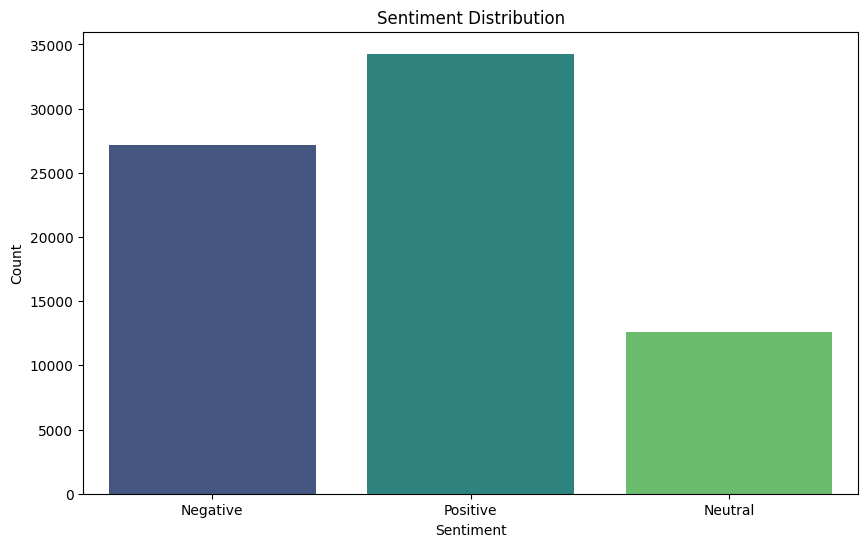

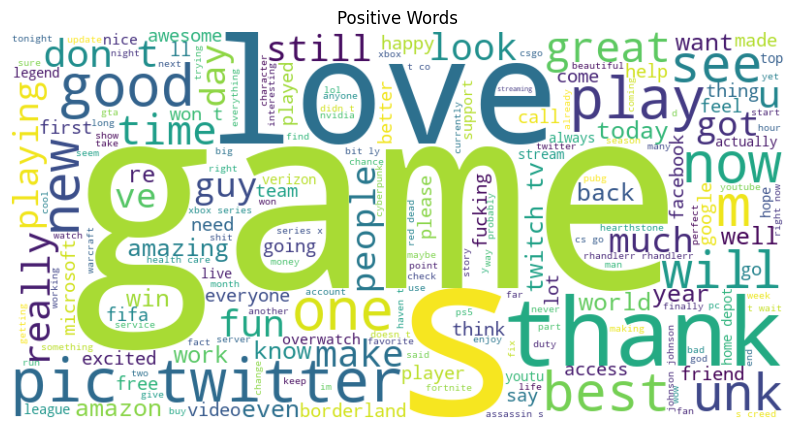

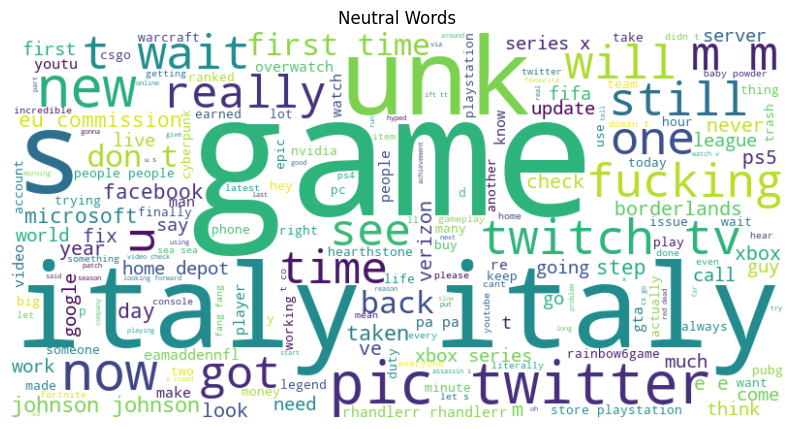

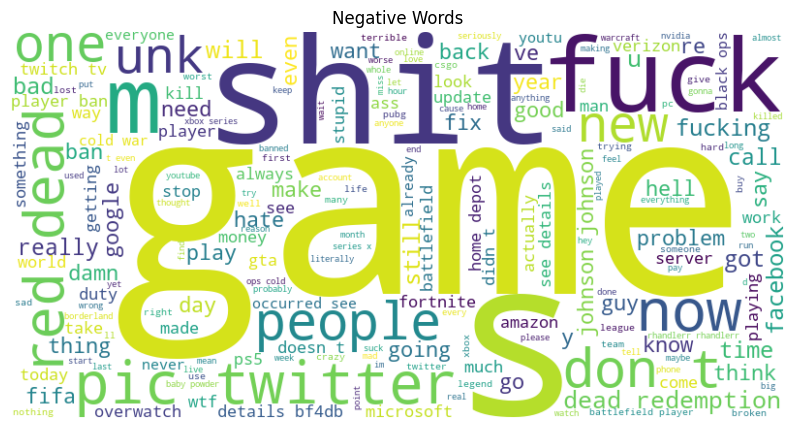

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Step 1: Load the Dataset
file_path = r"C:\Users\srbab\OneDrive\Desktop\prodigy programs\task4\twitter_training.csv"  # Adjust the file path to your environment
df = pd.read_csv(file_path)

# Inspect the columns
print(df.columns)

# Use the correct column name for tweet text
text_column = 'im getting on borderlands and i will murder you all ,'  # Replace with the actual column name

# Step 2: Preprocess the Data
# Remove missing values
df.dropna(subset=[text_column], inplace=True)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    return text

df['clean_content'] = df[text_column].apply(preprocess_text)

# Step 3: Sentiment Analysis
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(text):
    score = sia.polarity_scores(text)
    return score['compound']

df['sentiment_score'] = df['clean_content'].apply(get_sentiment_score)

# Categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# Step 4: Visualize the Sentiment Patterns
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate word cloud for each sentiment
def generate_wordcloud(data, sentiment):
    words = ' '.join(data[data['sentiment'] == sentiment]['clean_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Words')
    plt.axis('off')
    plt.show()

generate_wordcloud(df, 'Positive')
generate_wordcloud(df, 'Neutral')
generate_wordcloud(df, 'Negative')

# Plot average sentiment score over time if the dataset includes a timestamp
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    df.resample('M').mean()['sentiment_score'].plot(figsize=(12, 6), title='Average Sentiment Score Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Sentiment Score')
    plt.show()
